## RNN과 문서 분류


- RNN은 앞에서부터 순차적으로 미치는 영향을 계속 축적하는 모형이다.
- 문백을 이해하는 것도 이와 유사하다.
- 상대방이 하는 말을 순차적으로 들으면서 의미를 이해한다.
- 문맥은 단어들의 순서를 통해 형성되는데, RNN은 구조상 이와 같은 문백을 파악하기 좋은 모형이다.
- 앞 단어로부터 문백에 관한 정보가 마지막 노드까지 순차적으로 축적되면 그 정보를 이용해 문서를 분류한다.


----


- 예를 들어 I, am, so, happy라는 문장이 있을 때
- 가장 먼저 I가 초기 은닉 노드 값과 결합되어 은닉 노드로 변환되면
- 이 은닉 노드와 am으로부터 다음 은닉 노드가 생성되며 이를 반복하여 최종 은닉 노드에 네 단어의 정보가 순차적으로 축적된다.
- 하지만 RNN의 대표적인 문제점은 경사소실(Gradient Vanishing) 문제가 고질적으로 발생된다.
- 하지만 Bi-LSTM과 같은 모델의 적용을 위해 알아야 할 개념이다.


## 적용 방안


- RNN은 주어진 입력값들의 순서가 의미가 있을 때, 즉 입력값이 앞의 입력값들에 영향을 받는 경우에 사용된다.
- 자연어 처리에서는 문장을 이루는 단어들의 순서를 반영하기 위해 사용된다.
- 근본적으로 문장은 단어들의 순서에 따라 문맥이 결정되므로 문맥 파악에 순환 신경망이 사용된다.


## 적용 순서


- 먼저 문장을 토크나이징한다.
- 이후 원 핫 인코딩으로 수치화한다.
- 다음으로 짧은 길이의 밀집 벡터로 다시 변환하여 RNN 모형의 입력으로 사용한다.(워드 임베딩)
- 각 단어의 정보는 은닉 노드로 압축되고 이 과정에서 앞 단어가 뒤 단어에 미치는 영향이 순차적으로 축적되어 전달된다.


# 원 핫 인코딩


- 컴퓨터는 대부분의 분석 방법론이 수치 형태의 데이터를 다룬다.
- 범주형 데이터를 분석하려면 따라서 먼저 수치로 변환하야 한다.
- 수치로 변환하는 방법 중 0과 1로만 표시하는 방법ㅇㄹ 원핫 인코딩(one-hot encoding)이라 하고, 그 결과를 원핫 벡터라 한다.
- 문제는 말뭉치에 사용된 단어 수만큼 더미 변수가 필요하다는 것이다.
- 예를 들어 2만 개의 단어가 사용됐다면 하나의 단어를 표현하는데 2만개의 변수가 필요하다
- 단어는 문서 보다 훨씬 심각하게 희소 벡터가 된다. 결과적으로 2만개의ㅡ 값 중에 오직 하나의 변수만 1의 값을 갖기 때문이다.


# 워드 임베딩


- 임베딩은 범주형 데이터를 연속적인 값을 갖는, 상대적으로 작은 크기의 벡터로 변환하는 작업을 말한다.
- 워드 임베딩은 보통 단어에 대해 원핫 인코딩을 먼저 수행하고 이를 다시 연속형 값을 갖는 축소된 벡터로 변환하는 과정을 거친다.
- 연구 결과에 딸면 축소된 벡터의 크기는 100 ~ 300 정도이고 이러한 벡터를 희소 벡터의 반대 개념이 밀집 벡터라 한다.


# 워드 임베딩 사용 이유


- 원핫 벡터를 그대로 쓰면 연산이 비효율적이다.
- 원핫 벡터는 대상 간의 유사도를 계산할 수 없다.(코사인 유사도 사용 안됨)
- 단어가 의미적인 정보를 함축함으로써 연산이 가능해질 수 있다.
- 전이학습이 가능하다.
- 전이 학습은 기존에 학습된 모형을 새로운 환경에서 재사용함으로써 학습의 속도와 효과를 높이는 방법이다.
- 여기서는 학습을 통해 계산된 가중치가 전이 학습의 대상이 된다.


# 워드 임베딩과 딥러닝


- 대부분의 딥러닝 기반의 자연어 처리 기법에서는 문서를 단어의 시퀀스로 표현한다.
- 즉 문서를 입베딩하기보다는 단어를 임베딩하고, 그 단어의 시퀀스로 문서를 표현한다.
- BOW와의 가장 큰 차이점은 바로 단어의 순서를 고려해 문맥을 파악한다는 점이다.
- 여기서 BOW에서는 문서가 1차원 벡터로 표현되는 반면 워드 임베딩을 이용하게 되면 2차원 행렬 혹은 1차원 벡터 리스트로 표현된다.


In [53]:
# nltk 데이터 로드 
import nltk 

# 데이터셋 다운로드 

nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

fileids = movie_reviews.fileids()

print(fileids[:10])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\3호실-09\AppData\Roaming\nltk_data...


['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


[nltk_data]   Package movie_reviews is already up-to-date!


In [57]:
# 파일 아이디를 이용해 raw 텍스트 파일을 가져온다 
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
# print(reviews)

# 파일 이이디를 이용해 라벨로 사용할 카테고리, 즉 긍정 부정 정보를 순서대로 가져옴 
categories = [movie_reviews.categories(fileid)[0]for fileid in fileids]

print('리뷰갯수', len(reviews))
print('첫 번쨰 리뷰 길이', len(reviews[0]))
print('레이블', set(categories))

리뷰갯수 2000
첫 번쨰 리뷰 길이 4043
레이블 {'pos', 'neg'}


In [ ]:
print("siuuuuuuuuuuuuuuuuuuuuuuu")
# 케라스가 제공하는 토크나이저는 기본적인 토큰화 기능 외에, 토큰, 즉 단어인덱스를 부여해서 사전을 작성하고,
# 이 인덱스를 이용해 주어진 문장을 반환하는 기능을 제공한다.
# 예를 들어 I am so happy라는 문장이 있을 때, 이를 토큰화하면['I', 'am', 'so', 'happy']가 되고,
# 각 단어에 인덱스를 부여한 결과 7, 2, 9, 13이라면 [7, 2, 9, 13]으로 변환된다.


# num_words를 이용해 모형에 사용할 단어 수를 결정한다.
# fit_on_texts()를 수행하면 주어진 말뭉치에 대해 단어 인덱스 사전이 구축된다.
# texts_to_sequences()는 이 사전을 이용해 문서들의 인덱스의 시퀀스로 변환한다.
# 이때 말뭉치에 사용된 단어 수가 num_words에 지정된 값보다 큰 경우에는
# 사전에 포힘되지 않은 단어를 빼고 시퀀스를 생성한다.
# 이 단어들을 생략하고 싶지 않다면 oov_token 매개변수를 이용해 단어들을 변환할 문자열을 할당할 수 있고
# 이 경우에는 사전에 없는 단어들이 생략되는 대신 공통의 값으로 변환되어 들어간다.

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 10000 # 사용할 단어수 

# 빈도가 높은 10000개 단어를 선택하도록 객체 생성 
tokenizer = Tokenizer(num_words=max_words, oov_token="UNK")
tokenizer.fit_on_texts(reviews)# 단어 인덱스 구축 

X = tokenizer.texts_to_sequences(reviews)

# 처음 10개 리뷰 길이 출력 
print('처음 10개 리뷰 출력', [len(doc)for doc in X [:10]])

siuuuuuuuuuuuuuuuuuuuuuuu
처음 10개 리뷰 출력 [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [61]:
# 문자열 the 를 포함한 인덱스 
print("index of the", tokenizer.word_index['the'])

# oov(out of vocabulary) 사전 없는 단어 
print('index of oov' , tokenizer.word_index['UNK'])

index of the 2
index of oov 1


In [65]:
# 위 결과에서 리뷰의 길이가 다르므로 문서로부터 변환된 인덱스 시퀀스의 길이도 가변적일 수밖에 없다.
# 하지만 신경망 모형의 입력은 길이가 일정해야 하므로
# pad_sequences()를 이용해 모든 입력 시퀀스의 길이를 매개변수 maxlen의 인수만큼 동일하게 변환한다.
# 이때 시퀀스 크기가 maxlen보다 크면 남는 부분을 잘라야 하는데,
# truncating 매개변수는 잘라낼 부분의 위치를 지정힌다.
# pre이면 시퀀스 앞을 잘라내고, post이면 뒤를 잘라낸다.
# maxlen보다 작으면 남는 부분을 0으로 채운다.

from tensorflow.keras.preprocessing.sequence import  pad_sequences

maxlen = 700

# 문서의 단어 수가 700 보다 작으면 0, 크면 잘라냄 
# 잘라내는 위치는 앞을 잘라냄 
X = pad_sequences(X, maxlen=maxlen, truncating='pre', padding='post')

In [64]:
# 데이터 레이블 pos, neg 이진분류를 0과 1로 변경 
label_dict = {'pos': 1, 'neg': 0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [66]:
# 학습 데이터와 테스트 데이터셋 분리 
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## RNN이 아닌 일반적인 신경망 모형을 이용한 분류


- 단어를 임베딩하고 RNN의 효과를 비교하기 위해 먼저 로지스틱 회귀모형을 구현해서 시퀀스 정보 없이 예측을 수행한다.
- 케라스가 제공하는 Sequential 모형은 단순하게 순차적으로 층을 쌓아서 신경망 모형을 구성한다.
- 층이 순차적으로 쌓이지 않는 복잡한 모형이 아니라면 Sequential 모형으로 쉽고 빠르게 신경망 모형을 만들 수 있다.
----


- 임베딩 레이어, Flatten 레이어, Dense 레이어로 이뤄진 Sequential 모형을 구현한다.
- 임베딩 레이어는 RNN을 위해 만든 입력을 받아서 원핫 인코딩과 워드 입베딩을 수행한다.
- 현재 문서는 500개의 단어로 이뤄져 있고, 총 사용 단어는 10000개로 지정돼 있다.
- 따라서 단어를 원핫 인코딩으로 변환하면 길이가 10000인 벡터가 된다.
- 이때 하나의 문서는 (500, 10000), 즉 단어의 수와 각 단어의 크기만큼의 2차원 행렬로 표현된다.


----


- 워드 임베딩은 원핫 인코딩된 단어들을 일정한 크기의 밀집벡터로 변환한다.
- 여기서는 벡터의 크기를 32로 지정한다.
- 즉 크기가 10000이었던 단어 벡터는 32의 크기로 압축되는데, 이를 위해서는 10000 * 32만큼의 파라미터 혹은 가중치 변수가 요구된다.
- 모든 단어에 동일한 가중치를 적용해 워드 임베딩을 수행하므로 문서의 크기인 500은 파라미터의 수에 반영되지 않는다.
----


- 워드 임베딩을 한 결과는 (단어의 수, 단어를 표현하는 밀집 벡터의 크기)의 2차원 행렬이 된다.
- Output Shape의 가장 앞에 있는 None은 학습에 사용되는 입력의 수를 나타낸다.
- 한 번의 학습에 사용되는 입력의 수는 가변적이므로 모형을 정의하는 단계에서는 설정하지 않는다.
----
- Flatten 레이어는 2차원 행렬의 형태로 된 값을 펼쳐서 1차원 벡터로 변환한다.
- 형태만 변경하므로 별도의 파라미터는 사용하지 않는다.
- 500개의 단어에 대한 각 32개의 값들을 펼쳐서 총 500 * 32개의 독립적인 입력 변수로 저장한 후
- 이를 이용해 이진 로지스틱 회귀분석을 실시한다.
- 이렇게 하면 우리가 굳이 단어들의 순서를 우지하면서 문서를 표현한 보람이 없으나,
- 이 모형의 결과와 RNN 모형의 결과를 비교하고, 워드 임베딩에 익숙해지는 경험을 한다.
----
- Dense 레이어는 우리가 일반적인 신경망의 은닉층으로 알고 있는 모든 노드들이 연결되는 밀집 층을 생성한다.
- 여기서는 출력의 크기를 1로 하고 활성화 함수로 시그모이드를 지정하는데
- 이는 감성분석을 위해 이진 분류를 해야 하기 때문이다.


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# 파이퍼 파라미터 튜닝 
max_words = 10000
maxlen = 700

# 순차 모형 
model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    # word embedding layer 생성
    # max_words는 one-hot encoding을 할 때의 vector 크기가 된다
    # 각 단어는 32 크기의 dense vector로 임베딩
    # input_length는 한 document의 단어 수로 표현
    # 이 과정을 거치면 각 document는 (maxlen, 32)의 2차원 행렬이 된다.
    Flatten(),  # 2차원을 1차원으로 평탄화 
    Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, maxlen))

model.summary()

C:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 700, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 22400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          22,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 342,401 (1.31 MB)

 Trainable params: 342,401 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# 모델 컴파일: 이진분류 이기 떄문에 손실값은 바이너리_크로스 엔트로피 , 옵티마이져 rmpsprop 사용 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# 모델 학습 
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5404 - loss: 0.6895 - val_accuracy: 0.5250 - val_loss: 0.7096
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8172 - loss: 0.6103 - val_accuracy: 0.5250 - val_loss: 0.6917
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9117 - loss: 0.4797 - val_accuracy: 0.5906 - val_loss: 0.6663
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9759 - loss: 0.3293 - val_accuracy: 0.6187 - val_loss: 0.6500
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9925 - loss: 0.2004 - val_accuracy: 0.6000 - val_loss: 0.6539
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9992 - loss: 0.1100 - val_accuracy: 0.5594 - val_loss: 0.6669
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9987 - loss: 0.0597 - val_accuracy: 0.5906 - val_loss: 0.6861
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0314 - val_accuracy: 0.5844 - va

In [73]:
# 테스트 데이터 평가 
score = model.evaluate(X_test, y_test)
print(score[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6489 - loss: 0.7762
0.6474999785423279


## RNN 기반 문서분류


- RNN 모형을 적용함으로써 단어의 순서, 즉 문맥의 정보를 활용한 문서 분류를 실행한다.
- 앞선 모델과 가장 큰 차이점은 Flatten 대신에 simpleRNN 레이어를 사용함으로써 가장 기본적인 RNN 층을 추가하는 것이다.
- 케라스를 사용할 때 좋은 점은 이론이 복잡한 것에 비해 사용이 쉽다는 것이다.
- 여기서 사용할 예에서는 SimpleRNN에 쓰인 인수는 32인데, 이것은 은닉 노드의 크기다
- 현재 하나의 단어가 크기 32인 벡터로 표현되어 동일한 값을 사용했으나, 다른 값을 사용해도 된다.
- 이전 모형과 또 다른 점은 SimpleRNN 레이어 뒤에 Dense 레이어를 추가하는 것이다.
- 이는 최종 노드에 대해 은닉층 하나를 추가해 모형의 성능을 높인 것이다.
- 활성화 함수는 relu로 지정하고 옵티마이저로는 rmsprop 대신 Adam을 사용한다.
- 앞에서는 문자열을 인수로 주었는데, 여기서는 객체를 선언하고 그 객체를 인수로 전달한다.


In [75]:
# rnn 모델 훈련 구현 
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential(
    [
        Embedding(max_words, output_dim=32),
        SimpleRNN(32),
        Dense(32, activation='relu'),
        Dense(1, activation="sigmoid"),
    ]
)

model.build(input_shape=(None, maxlen))

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 700, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 323,169 (1.23 MB)

 Trainable params: 323,169 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# 모델 훈련
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.4996 - loss: 0.6961 - val_accuracy: 0.4563 - val_loss: 0.7020
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5896 - loss: 0.6780 - val_accuracy: 0.4469 - val_loss: 0.7014
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6670 - loss: 0.6645 - val_accuracy: 0.4531 - val_loss: 0.7016
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7172 - loss: 0.6470 - val_accuracy: 0.5031 - val_loss: 0.6975
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7862 - loss: 0.6207 - val_accuracy: 0.4719 - val_loss: 0.6998
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8390 - loss: 0.5850 - val_accuracy: 0.4875 - val_loss: 0.7070
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.8696 - loss: 0.5460 - val_accuracy: 0.5375 - val_loss: 0.7054
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.8987 - loss: 0.4973 - val_accuracy: 0.4844 - val_loss: 

In [78]:
# test data model eval
score = model.evaluate(X_test, y_test)

# 결과를 보면 과대 적합만 이뤄지고 있을 뿐, 실제 학습은 거의 되지 않고 있다.
# 가장 중요한 원인은 딥러닝의 가장 큰 문제점인 경사 소실에 있다.
# 위 모형의 경우 하나의 문서는 500개 단어로 이뤄지는데, 이는 500개 층이 겹겹이 쌓여 있는 것으로 볼 수 있다.
# RNN의 목적은 앞에서부터 순서에 따라 다음 단어에 미치는 영향을 축적하는 것인데
# 이것이 경사소실 문제로 인해 학습이 잘 되지 못하고 있다.
# 이러한 현상을 장기간에 걸친 시간의존성(long term dependency)이 학습되지 못하는 현상이라 한다.
# 이를 해결하기 위해 제안된 모델이 LSTM(Long Short Term Memory)다


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4939 - loss: 0.7783


## LSTM 모형


- 이 모형은 뒤로 갈수록 정보가 소실되는 것을 방지하기 위해 장기의존성과 단기의존성을 모두 표현하는 학습 방법이다.
- 구조적 원리는 감쇠, 즉 기억 손실이 없는 컨베이어 벨트를 추가로 만드는 것이라 이해할 수 있다.


## Bi-directional LSTM


- RNN을 개선하는 또 다른 방법 중 하나는 양방향으로 모형을 구축하는 것이다.
- 언어의 경우 앞 단어가 뒤 단어에 영향을 주기도 하지만 그 반대도 마찬가지다.
- 이라한 역방향의 영향을 함께 구현하기 위해 사용되는 것이 양방향 LSTM이다
- 두 개 층의 LSTM을 구현하고 각 층의 은닉 노드를 연경(concatenate)해서 완전한 은닉 노드를 만든다.
- 앞의 모델에서 SimpleRNN 대신에 LSTM을 임포트 해서 쓰면 된다.
- 또한 양방향 LSTM을 사용할 때는 Bidirectional로 LSTM 레이어를 감싸주면된다.


In [79]:
# 워드 임베딩 벡터의 크기를 64로 늘리고, 양방향 LSTM 구현
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential([
    Embedding(max_words, output_dim=64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 가중치를 초기화
model.build(input_shape=(None, maxlen))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 700, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714,369 (2.73 MB)

 Trainable params: 714,369 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# 모델 컴파일 및 학습
adam = Adam(learning_rate=1e-4)  # 학습률 설정
model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 319ms/step - accuracy: 0.5013 - loss: 0.6927 - val_accuracy: 0.4531 - val_loss: 0.6947
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - accuracy: 0.5388 - loss: 0.6908 - val_accuracy: 0.4563 - val_loss: 0.6952
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.5803 - loss: 0.6872 - val_accuracy: 0.5063 - val_loss: 0.6954
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.6495 - loss: 0.6854 - val_accuracy: 0.5312 - val_loss: 0.6942
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.6684 - loss: 0.6736 - val_accuracy: 0.5469 - val_loss: 0.6890
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - accuracy: 0.7689 - loss: 0.5819 - val_accuracy: 0.6344 - val_loss: 0.6277
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.8630 - loss: 0.4104 - val_accuracy: 0.7719 - val_loss: 0.5032
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step - accuracy: 0.9196 - loss: 0.2599 - val_accur

In [85]:
score = model.evaluate(X_test, y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8118 - loss: 0.4637


In [83]:
import matplotlib.pyplot as plt


def plot_results(history, metric):
    plt.plot(history.history[metric], "b", label="Traning" + metric)
    plt.plot(history.history["val_" + metric], "r--", label="Validation " + metric)
    plt.title("Traning and validation " + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()
    plt.show()


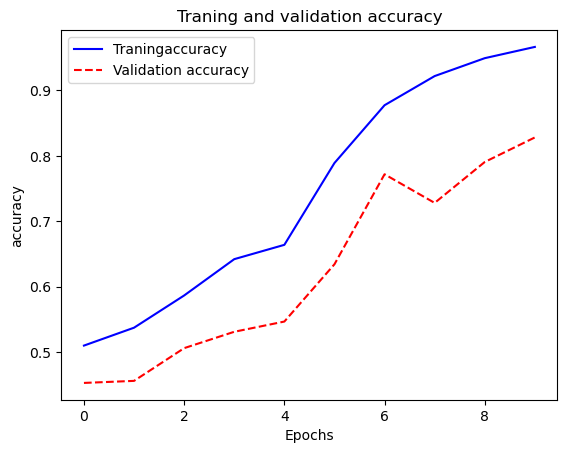

In [84]:
plot_results(history, "accuracy")
